In [54]:
import os

import seaborn as sns
import matplotlib.pyplot as plt

lines = open('train_prediction.txt', 'r').readlines()
lines = [tmp.strip() for tmp in lines]

In [55]:
#path, pred, label, score
paths, preds, labels, scores = [], [], [], []
confusion_mat = [[0]*42 for _ in range(42)]
cnt = 0 
cnt_wrong = {}
for line in lines:
#     print(i)
    path, pred, label = line.split()[0], line.split()[1], line.split()[2]
    score = line.split('[')[-1].replace(']', '')
    score = [float(tmp) for tmp in score.split(',')]
    
    pred, label = int(pred), int(label)
    confusion_mat[pred][label] += 1 
    if pred != label:
        if (label, pred) in cnt_wrong.keys():
            cnt_wrong[(label, pred)] += 1
        else:
            cnt_wrong[(label, pred)] = 1
        cnt += 1
cnt

11026

In [56]:
def draw_heat_map(type_idx):
    table = type_similarity_table(type_idx)
    tests = [transform_test_name(tmp) for tmp in types[type_idx]]
    table = np.rot90(np.array(table))
    print(tests)
    ax = sns.heatmap(np.array(table), xticklabels=tests, yticklabels=tests[::-1], linewidth=1)
    plt.savefig(f'{type_idx}.eps', format='eps', bbox_inches='tight')
    plt.show()

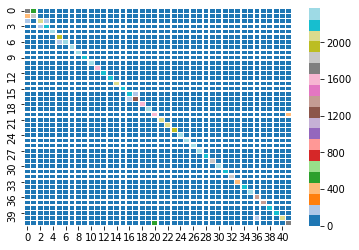

In [57]:
sns.heatmap(confusion_mat, cmap='tab20', linewidths=0.5)

plt.savefig('destination_path.eps', format='eps')

In [41]:
li = [(k,v) for k,v in cnt_wrong.items()]

In [44]:
li = sorted(li, key=lambda x: -x[-1])

In [53]:
for k,v in li:
    s+=v
    print(k, v)

(20, 41) 69
(1, 0) 55
(41, 20) 48
(0, 1) 44
(2, 3) 33
(3, 2) 30
(17, 16) 28
(16, 17) 22
(2, 0) 22
(0, 2) 21
(3, 0) 18
(18, 36) 18
(34, 35) 18
(5, 6) 18
(35, 34) 17
(16, 30) 17
(39, 38) 16
(0, 3) 15
(31, 15) 15
(34, 15) 14
(28, 3) 14
(36, 31) 14
(3, 28) 14
(36, 40) 14
(15, 31) 13
(34, 31) 12
(30, 16) 12
(6, 5) 12
(9, 8) 11
(36, 18) 11
(26, 6) 10
(37, 18) 10
(22, 7) 9
(36, 38) 9
(18, 19) 9
(36, 19) 9
(11, 10) 8
(4, 29) 8
(10, 8) 8
(28, 29) 8
(21, 30) 8
(8, 9) 8
(36, 34) 8
(13, 34) 8
(31, 39) 8
(8, 10) 8
(41, 39) 8
(29, 28) 8
(26, 40) 8
(20, 40) 7
(2, 28) 7
(15, 34) 7
(36, 20) 7
(40, 39) 7
(38, 39) 7
(36, 32) 6
(14, 13) 6
(14, 18) 6
(26, 19) 6
(18, 34) 6
(13, 32) 6
(23, 6) 6
(36, 21) 6
(34, 33) 6
(15, 38) 6
(36, 33) 6
(10, 11) 6
(38, 36) 6
(11, 18) 6
(18, 12) 6
(22, 36) 6
(18, 26) 6
(41, 18) 6
(22, 26) 6
(36, 26) 6
(14, 38) 6
(26, 18) 5
(29, 4) 5
(5, 15) 5
(19, 18) 5
(39, 13) 5
(36, 5) 5
(34, 36) 5
(27, 26) 5
(3, 1) 5
(11, 37) 5
(40, 36) 5
(5, 23) 5
(12, 41) 5
(5, 38) 5
(38, 14) 5
(40, 26

# Make submission

In [79]:
lines = open('test_prediction.txt', 'r').readlines()


In [80]:
lines[:10]
filename = [tmp.split()[0].split('/')[-1] for tmp in lines]
category = [tmp.split()[1].split('/')[-1] for tmp in lines]

In [81]:
df = pd.DataFrame.from_dict({'filename': filename, 'category': category})
df.to_csv('submission.csv', index=False)

In [82]:
import pandas as pd